<h1><center><span style="color:#369;background:#fdf;padding: 10px 30px 10px 30px;border: 3px solid #369;border-radius:7px;">Représentation des graphes avec la classe networkx</span></center></h1>

Commençons par installer le module pour importer la bibliothèque :

In [29]:
!pip install networkx

In [30]:
import networkx as nx #SyntaxWarning à ignorer

# 1. Les graphes non orientés

- On crée une instance de la classe Graph de networkx :

In [31]:
G = nx.Graph() # crée un graphe vide

## Les sommets

In [32]:
G.add_node("A")  # ajoute le sommet A

G.add_nodes_from(["B", "C"])  # ajoute plusieurs sommets, ici B et C

H = nx.Graph() # un autre graphe

H.add_nodes_from(G)  # ajoute tous les sommets du graphe G

- On peut avoir envie de récupérer la liste des sommets :

In [33]:
G.nodes() # un objet NodeView pour obtenir tous les sommets

NodeView(('A', 'B', 'C'))

In [34]:
H.nodes()

NodeView(('A', 'B', 'C'))

In [35]:
list(G.nodes)  # ou list(G.nodes()) pour les avoir sous forme d'une liste

['A', 'B', 'C']

- Si le sommet existe déjà, l'ajouter ne produit rien :

In [36]:
G.add_node("A")
print(G.nodes)  # ou print(G.nodes())

['A', 'B', 'C']


- On peut même créer rapidement un graphe à n sommets étiquetés par des entiers

In [37]:
G1=nx.Graph()
G1.add_nodes_from(range(1,10))
print(G1.nodes)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


- On peut aussi créer rapidement un graphe dont les sommets sont des lettres de l'alphabets

In [38]:
G2=nx.Graph()
G2.add_nodes_from("ABCDEF")
print(G2.nodes)

['A', 'B', 'C', 'D', 'E', 'F']


- Pour récupérer l'ordre du graphe, il y a deux façons :

In [39]:
G.number_of_nodes()

3

In [40]:
G.order()

3

## Les arêtes

- On peut bien sûr ajouter des arêtes en mentionnant les noms des sommets :

In [41]:
G.add_edge("A", "B") # ajoute l'arête entre les sommets "A" et "B"
G.add_edges_from([("B", "D"), ("B", "C")])  # ajoute plusieurs arêtes, ici deux

- On peut même créer les sommets à l'aide des arêtes !

In [42]:
G.add_edge("A", "E")  # crée le sommet E et le relie à A

In [43]:
list(G.nodes) # on vérifie que le sommet E a bien été créé

['A', 'B', 'C', 'D', 'E']

- On peut récupérer la liste des arêtes :

In [44]:
G.edges() # un objet EdgeView pour obtenir toutes les arêtes

EdgeView([('A', 'B'), ('A', 'E'), ('B', 'D'), ('B', 'C')])

In [45]:
list(G.edges) # ou list(G.edges()) pour les avoir sous forme d'une liste

[('A', 'B'), ('A', 'E'), ('B', 'D'), ('B', 'C')]

- Pour récupérer le nombre d'arêtes, il y a deux façons :

In [46]:
G.number_of_edges()

4

In [47]:
G.size()

4

- pour tester si deux sommets sont voisins :

In [1]:
('A', 'B') in G.edges

NameError: name 'G' is not defined

In [49]:
('B', 'A') in G.edges # comme le graphe n'est pas orienté, ('A','B') est une arête si ('B','A') en est une

True

<div class="alert alert-warning">Attention à ne pas convertir <code>G.edges</code> en liste car la liste est composée de tuples et le tuple <code>('A','B')</code> est différent de <code>('B','A')</code></div> 

In [50]:
L=list(G.edges)

In [51]:
('A', 'B') in L

True

In [52]:
('B', 'A') in L # alors que ('B','A') est bien une arête de G

False

- Pour supprimer une arête :

In [53]:
G.remove_edge('A','E')
G.edges()

EdgeView([('A', 'B'), ('B', 'D'), ('B', 'C')])

<div class="alert alert-warning">Attention : la métode <code>remove_edge</code> provoque une erreur si on veut supprimer une arête qui n'existait pas</div> 

- Pour supprimer un sommet ainsi que toutes ses arêtes incidentes :

In [54]:
G.remove_node('E')
print(G.nodes())
print(G.edges())

['A', 'B', 'C', 'D']
[('A', 'B'), ('B', 'D'), ('B', 'C')]


<div class="alert alert-warning">Attention : la métode <code>remove_node</code> provoque une erreur si on veut supprimer une sommet qui n'existe pas</div> 

## Compléments
- Pour vérifier si le graphe est orienté ou pas :

In [55]:
G.is_directed() # en anglais directed signifie orienté

False

- pour obtenir les voisins d'un sommet :

In [56]:
list(G.neighbors('B')) # la méthode neighbors() renvoie ce qu'on appelle un itérateur,
# Un itérateur sert à être parcouru à l'aide d'une boucle for mais pour le visualiser
# il faut le convertir en une liste

['A', 'D', 'C']

- Pour parcourir à l'aide d'une boucle tous les voisins d'un sommet :

In [57]:
for s in G.neighbors('B'): # pour parcourir tous les voisins de 'B'
    print(s)

A
D
C


- Pour obtenir le degré d'un sommet :

In [58]:
G.degree('A')

1

In [59]:
G.degree # ou pour les avoir tous

DegreeView({'A': 1, 'B': 3, 'C': 1, 'D': 1})

- Pour obtenir la liste des voisins de chaque sommet :

In [60]:
G.adj # les accolades sont vides car le graphe n'est pas pondéré

AdjacencyView({'A': {'B': {}}, 'B': {'A': {}, 'D': {}, 'C': {}}, 'C': {'B': {}}, 'D': {'B': {}}})

# 2. Représenter un graphe non orienté

- On commence par créer un graphe simple

In [61]:
G = nx.Graph()
G.add_edges_from(
    [("A", "B"), ("B", "C"), ("C", "D"), ("D", "A"), ("A", "C"), ("C", "E")]
)

- Et voici comment le dessiner de manière basique : on doit d'abord importer de la bibliothèque
`matplotlib`

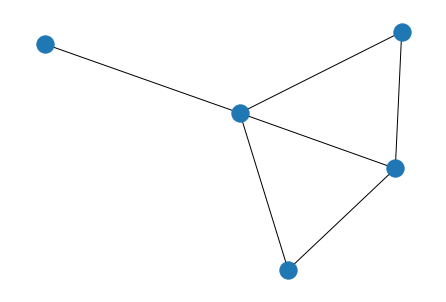

In [62]:
import matplotlib.pyplot as plt
plt.clf() # on efface
nx.draw(G) # on dessine
plt.show() # on montre le dessin

C'est bien mais il nous manque les noms des sommets !

Heureusement il est facile de les afficher :

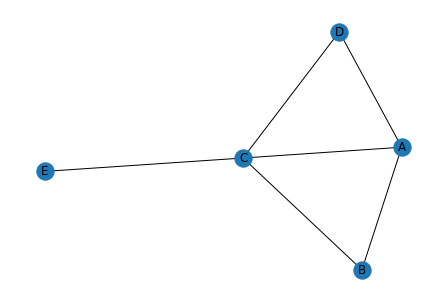

In [63]:
plt.clf() # on efface (sinon il y aura 1 seule figure qui contiendra tous les graphes non effacés)
nx.draw(G, with_labels=True)
plt.show()

### Exercice 1
Représenter le graphe <code>G1</code> ci-contre (<i>attention, il est possible que vous obteniez un schéma différent, vous devez vérifier qu'il s'agit en fait du même graphe en examinant tous les voisins de chaque sommet</i>) :

![graphes_networkx_ex1.png](https://ericecmorlaix.github.io/img/graphes_networkx_ex1.png)
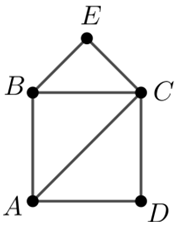

In [64]:
# votre code
C = nx.Graph()
C.add_edges_from(
    [("A", "C"), ("A", "D"), ("B", "A"), ("B", "C"), ("C", "D"), ("B", "E"), ("C", "E")]
)

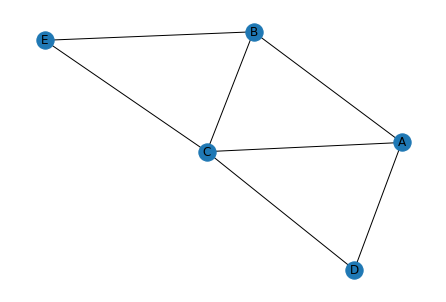

In [65]:
import matplotlib.pyplot as plt
plt.clf() # on efface
nx.draw(C, with_labels=True) # on dessine
plt.show() # on montre le dessin

### Exercice 2
Représenter de même le graphe <code>G2</code> associé au plan du musée ci-dessous

![graphes_networkx_ex2.png](https://ericecmorlaix.github.io/img/graphes_networkx_ex2.png)
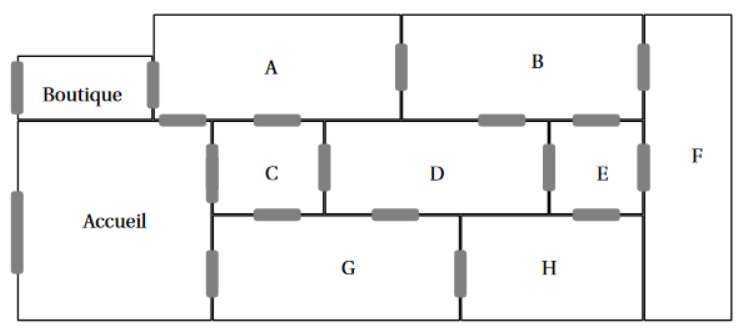

In [66]:
# votre code
M = nx.Graph()
M.add_edges_from(
    [("BOUTIQUE", "A"), ("A", "ACCUEIL"), ("A", "C"), ("A", "B"), ("C", "ACCUEIL"), ("C", "G"), ("C", "D"), ("ACCUEIL", "G"), ("G", "D"), ("B", "D"),("D", "E"), ("E", "B"),("H", "E"), ("G", "H"),("F", "B"), ("F", "E")]
)

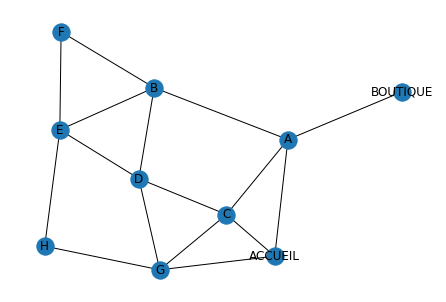

In [67]:
import matplotlib.pyplot as plt
plt.clf() # on efface
nx.draw(M, with_labels=True) # on dessine
plt.show() # on montre le dessin

### Exercice 3
Compléter la fonction <code>matriceDadjacence</code> qui renvoie la matrice d'adjacence d'un graphe simple (orienté ou pas) puis la tester sur les graphes précédents.

In [116]:
def matriceDadjacence(G):
    ''' In : un graphe simple G (orienté ou pas)
        Out: la matrice d'adjacence sous forme d'une liste de listes'''
    n= G.order() # ordre de G càd le nb de sommetsa
    L=[[0]*n for i in range(n)] # une liste de listes initialisées à 0
    sommets=list(G.nodes) # liste des sommets
    for i in range(n):
        for j in range(n):
            if (sommets[i],sommets[j]) in G.edges: # si les sommets d'indice i et j sont adjacents
                L[i][j]= 1
    return L

In [69]:
matriceDadjacence(G)

[[0, 1, 1, 1, 0],
 [1, 0, 1, 0, 0],
 [1, 1, 0, 1, 1],
 [1, 0, 1, 0, 0],
 [0, 0, 1, 0, 0]]

In [70]:
# Jeu de tests
matriceDadjacence(C)

[[0, 1, 1, 1, 0],
 [1, 0, 1, 1, 1],
 [1, 1, 0, 0, 0],
 [1, 1, 0, 0, 1],
 [0, 1, 0, 1, 0]]

In [71]:
# Jeu de tests
matriceDadjacence(M)

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]

In [72]:
# Test de la fonction précédente
# permet de voir que votre fonction à l'air correcte, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=nx.Graph()
GTest.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 13), (1, 3), (1, 5), (1, 7), (1, 8), (1, 10), (1, 11), (1, 18), (1, 19), (2, 6), (2, 8), (2, 15), (2, 16), (2, 18), (2, 19), (3, 5), (3, 6), (3, 8), (3, 11), (3, 13), (3, 15), (3, 16), (3, 18), (3, 19), (4, 5), (4, 8), (4, 14), (4, 15), (4, 16), (4, 17), (5, 7), (5, 9), (5, 11), (5, 12), (5, 14), (5, 16), (5, 17), (5, 18), (5, 19), (6, 7), (6, 8), (6, 9), (6, 10), (6, 12), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (7, 9), (7, 12), (7, 14), (7, 15), (7, 16), (7, 19), (13, 10), (13, 11), (13, 16), (13, 17), (13, 18), (8, 9), (8, 10), (8, 11), (8, 14), (8, 17), (8, 19), (10, 12), (10, 15), (10, 16), (10, 17), (10, 18), (11, 9), (11, 15), (11, 16), (11, 17), (11, 18), (18, 12), (18, 14), (18, 15), (18, 17), (19, 9), (19, 16), (19, 17), (15, 9), (15, 16), (16, 12), (14, 12), (17, 12), (9, 12)])
assert matriceDadjacence(GTest)==[[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0], [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0], [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0], [0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]]

### Exercice 4
Compléter la fonction <code>listeDadjacence</code> qui renvoie la liste d'adjacence d'un graphe G sous forme de dictionnaire, puis la tester sur les graphes précédents.

In [73]:
def listeDadjacence(G):
    ''' In : un graphe simple G (orienté ou pas)
        Out: la liste d'adjacence de G sous forme d'un dictionnaire'''
    d=dict() # ou d={} pour créer un dictionnaire vide 
    for s in G.nodes(): # pour chaque sommet s, on initialise la liste des voisins à une liste vide
        d[s]= [] # correspondra à la liste des successeurs de s
    for s in G.nodes():# pour chaque sommet s
        for v in G.nodes():# pour chaque sommet v
            if (s,v) in G.edges():# si v est le successeur de s
                d[s].append(v) # on ajoute le sommet v à la liste des successeurs de s
    return d

In [74]:
# Jeu de tests
listeDadjacence(C)

{'A': ['C', 'D', 'B'],
 'C': ['A', 'D', 'B', 'E'],
 'D': ['A', 'C'],
 'B': ['A', 'C', 'E'],
 'E': ['C', 'B']}

In [75]:
# Jeu de tests
listeDadjacence(M)

{'BOUTIQUE': ['A'],
 'A': ['BOUTIQUE', 'ACCUEIL', 'C', 'B'],
 'ACCUEIL': ['A', 'C', 'G'],
 'C': ['A', 'ACCUEIL', 'G', 'D'],
 'B': ['A', 'D', 'E', 'F'],
 'G': ['ACCUEIL', 'C', 'D', 'H'],
 'D': ['C', 'B', 'G', 'E'],
 'E': ['B', 'D', 'H', 'F'],
 'H': ['G', 'E'],
 'F': ['B', 'E']}

In [76]:
# Test de la fonction précédente
# permet de voir que votre fonction à l'air correcte, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=nx.Graph()
GTest.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 13), (1, 3), (1, 5), (1, 7), (1, 8), (1, 10), (1, 11), (1, 18), (1, 19), (2, 6), (2, 8), (2, 15), (2, 16), (2, 18), (2, 19), (3, 5), (3, 6), (3, 8), (3, 11), (3, 13), (3, 15), (3, 16), (3, 18), (3, 19), (4, 5), (4, 8), (4, 14), (4, 15), (4, 16), (4, 17), (5, 7), (5, 9), (5, 11), (5, 12), (5, 14), (5, 16), (5, 17), (5, 18), (5, 19), (6, 7), (6, 8), (6, 9), (6, 10), (6, 12), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (7, 9), (7, 12), (7, 14), (7, 15), (7, 16), (7, 19), (13, 10), (13, 11), (13, 16), (13, 17), (13, 18), (8, 9), (8, 10), (8, 11), (8, 14), (8, 17), (8, 19), (10, 12), (10, 15), (10, 16), (10, 17), (10, 18), (11, 9), (11, 15), (11, 16), (11, 17), (11, 18), (18, 12), (18, 14), (18, 15), (18, 17), (19, 9), (19, 16), (19, 17), (15, 9), (15, 16), (16, 12), (14, 12), (17, 12), (9, 12)])
assert listeDadjacence(GTest)=={0: [1, 2, 3, 4, 5, 6, 7, 13], 1: [0, 3, 5, 7, 8, 10, 11, 18, 19], 2: [0, 6, 8, 18, 19, 15, 16], 3: [0, 1, 5, 6, 13, 8, 11, 18, 19, 15, 16], 4: [0, 5, 8, 15, 16, 14, 17], 5: [0, 1, 3, 4, 7, 11, 18, 19, 16, 14, 17, 9, 12], 6: [0, 2, 3, 7, 8, 10, 18, 19, 15, 16, 14, 17, 9, 12], 7: [0, 1, 5, 6, 19, 15, 16, 14, 9, 12], 13: [0, 3, 10, 11, 18, 16, 17], 8: [1, 2, 3, 4, 6, 10, 11, 19, 14, 17, 9], 10: [1, 6, 13, 8, 18, 15, 16, 17, 12], 11: [1, 3, 5, 13, 8, 18, 15, 16, 17, 9], 18: [1, 2, 3, 5, 6, 13, 10, 11, 15, 14, 17, 12], 19: [1, 2, 3, 5, 6, 7, 8, 16, 17, 9], 15: [2, 3, 4, 6, 7, 10, 11, 18, 16, 9], 16: [2, 3, 4, 5, 6, 7, 13, 10, 11, 19, 15, 12], 14: [4, 5, 6, 7, 8, 18, 12], 17: [4, 5, 6, 13, 8, 10, 11, 18, 19, 12], 9: [5, 6, 7, 8, 11, 19, 15, 12], 12: [5, 6, 7, 10, 18, 16, 14, 17, 9]}

### Exercice 5
Compléter la fonction <code>matriceEnDictionnaire</code> puis la tester sur un jeu de tests (qui pourra faire appel aux graphes précédents et aux fonctions précédentes).

In [81]:
def matriceEnDictionnaire(L,sommets):
    ''' In : une matrice d'adjacence L sous forme d'une liste de listes et une liste de sommets
        Out: la liste d'adjacence sous forme d'un dictionnaire'''
    n=len(L) # ou n=len(sommets) le nombre sommets
    d=dict() # ou d={}
    for i in range(n): # pour chaque sommet s, on initialise la liste des voisins à une liste vide
        d[sommets[i]]= [] # on initialise le sommet d'indice i (il faut se servir de la liste sommets)
    for i in range(n):# pour chaque sommet s
        for j in range(n):# pour chaque sommet v
            if L[i][j] == 1:# si i et j sont voisins
                d[sommets[i]].append(sommets[j]) # on ajoute le sommet d'indice j à la liste des successeurs du sommet d'indice i
    return d

In [87]:
# Jeu de tests
matriceEnDictionnaire(matriceDadjacence(G),list(G.nodes))

{'A': ['B', 'C', 'D'],
 'B': ['A', 'C'],
 'C': ['A', 'B', 'D', 'E'],
 'D': ['A', 'C'],
 'E': ['C']}

In [88]:
# Jeu de tests
matriceEnDictionnaire(matriceDadjacence(M),list(M.nodes))

{'BOUTIQUE': ['A'],
 'A': ['BOUTIQUE', 'ACCUEIL', 'C', 'B'],
 'ACCUEIL': ['A', 'C', 'G'],
 'C': ['A', 'ACCUEIL', 'G', 'D'],
 'B': ['A', 'D', 'E', 'F'],
 'G': ['ACCUEIL', 'C', 'D', 'H'],
 'D': ['C', 'B', 'G', 'E'],
 'E': ['B', 'D', 'H', 'F'],
 'H': ['G', 'E'],
 'F': ['B', 'E']}

In [89]:
# Jeu de tests
matriceEnDictionnaire(matriceDadjacence(C),list(C.nodes))


{'A': ['C', 'D', 'B'],
 'C': ['A', 'D', 'B', 'E'],
 'D': ['A', 'C'],
 'B': ['A', 'C', 'E'],
 'E': ['C', 'B']}

In [90]:
# Test de la fonction précédente
# permet de voir que votre fonction à l'air correcte, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=nx.Graph()
GTest.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 13), (1, 3), (1, 5), (1, 7), (1, 8), (1, 10), (1, 11), (1, 18), (1, 19), (2, 6), (2, 8), (2, 15), (2, 16), (2, 18), (2, 19), (3, 5), (3, 6), (3, 8), (3, 11), (3, 13), (3, 15), (3, 16), (3, 18), (3, 19), (4, 5), (4, 8), (4, 14), (4, 15), (4, 16), (4, 17), (5, 7), (5, 9), (5, 11), (5, 12), (5, 14), (5, 16), (5, 17), (5, 18), (5, 19), (6, 7), (6, 8), (6, 9), (6, 10), (6, 12), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (7, 9), (7, 12), (7, 14), (7, 15), (7, 16), (7, 19), (13, 10), (13, 11), (13, 16), (13, 17), (13, 18), (8, 9), (8, 10), (8, 11), (8, 14), (8, 17), (8, 19), (10, 12), (10, 15), (10, 16), (10, 17), (10, 18), (11, 9), (11, 15), (11, 16), (11, 17), (11, 18), (18, 12), (18, 14), (18, 15), (18, 17), (19, 9), (19, 16), (19, 17), (15, 9), (15, 16), (16, 12), (14, 12), (17, 12), (9, 12)])
L=[[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0], [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0], [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0], [0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]]
sommets=list(GTest.nodes)
assert matriceEnDictionnaire(L,sommets)=={0: [1, 2, 3, 4, 5, 6, 7, 13], 1: [0, 3, 5, 7, 8, 10, 11, 18, 19], 2: [0, 6, 8, 18, 19, 15, 16], 3: [0, 1, 5, 6, 13, 8, 11, 18, 19, 15, 16], 4: [0, 5, 8, 15, 16, 14, 17], 5: [0, 1, 3, 4, 7, 11, 18, 19, 16, 14, 17, 9, 12], 6: [0, 2, 3, 7, 8, 10, 18, 19, 15, 16, 14, 17, 9, 12], 7: [0, 1, 5, 6, 19, 15, 16, 14, 9, 12], 13: [0, 3, 10, 11, 18, 16, 17], 8: [1, 2, 3, 4, 6, 10, 11, 19, 14, 17, 9], 10: [1, 6, 13, 8, 18, 15, 16, 17, 12], 11: [1, 3, 5, 13, 8, 18, 15, 16, 17, 9], 18: [1, 2, 3, 5, 6, 13, 10, 11, 15, 14, 17, 12], 19: [1, 2, 3, 5, 6, 7, 8, 16, 17, 9], 15: [2, 3, 4, 6, 7, 10, 11, 18, 16, 9], 16: [2, 3, 4, 5, 6, 7, 13, 10, 11, 19, 15, 12], 14: [4, 5, 6, 7, 8, 18, 12], 17: [4, 5, 6, 13, 8, 10, 11, 18, 19, 12], 9: [5, 6, 7, 8, 11, 19, 15, 12], 12: [5, 6, 7, 10, 18, 16, 14, 17, 9]}

### Exercice 6
Compléter la fonction <code>dictionnaireEnMatrice</code> qui fait l'inverse de la fonction précédente puis la tester à l'aide des graphes précédents et des fonctions précédentes.

In [92]:
def dictionnaireEnMatrice(d):
    ''' In : un dictionnaire où les clés sont les sommets et les valeurs les listes des voisins
        Out: la matrice d'adjacence associée'''
    n=len(d) # nb de sommets
    sommets=list(d.keys()) # la liste des sommets
    L=[[0]*n for i in range(n)] # une liste de listes initialisées à 0
    for i in range(n):# pour chaque sommet s
        for j in range(n):# pour chaque sommet v
            if sommets[i] in d[sommets[j]]:# si le sommet d'indice i est le successeur de celui d'indice j
                L[i][j]= 1
    return L,sommets

In [94]:
# Jeu de tests
dictionnaireEnMatrice(matriceEnDictionnaire(matriceDadjacence(G),list(G.nodes)))

([[0, 1, 1, 1, 0],
  [1, 0, 1, 0, 0],
  [1, 1, 0, 1, 1],
  [1, 0, 1, 0, 0],
  [0, 0, 1, 0, 0]],
 ['A', 'B', 'C', 'D', 'E'])

In [95]:
# Jeu de tests
dictionnaireEnMatrice(matriceEnDictionnaire(matriceDadjacence(M),list(M.nodes)))

([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
  [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
  [0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 1, 1, 0, 1],
  [0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
  [0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
  [0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
  [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 1, 0, 0]],
 ['BOUTIQUE', 'A', 'ACCUEIL', 'C', 'B', 'G', 'D', 'E', 'H', 'F'])

In [96]:
# Jeu de tests
dictionnaireEnMatrice(matriceEnDictionnaire(matriceDadjacence(C),list(C.nodes)))

([[0, 1, 1, 1, 0],
  [1, 0, 1, 1, 1],
  [1, 1, 0, 0, 0],
  [1, 1, 0, 0, 1],
  [0, 1, 0, 1, 0]],
 ['A', 'C', 'D', 'B', 'E'])

In [93]:
# Test de la fonction précédente
# permet de voir que votre fonction à l'air correcte, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=nx.Graph()
GTest.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 13), (1, 3), (1, 5), (1, 7), (1, 8), (1, 10), (1, 11), (1, 18), (1, 19), (2, 6), (2, 8), (2, 15), (2, 16), (2, 18), (2, 19), (3, 5), (3, 6), (3, 8), (3, 11), (3, 13), (3, 15), (3, 16), (3, 18), (3, 19), (4, 5), (4, 8), (4, 14), (4, 15), (4, 16), (4, 17), (5, 7), (5, 9), (5, 11), (5, 12), (5, 14), (5, 16), (5, 17), (5, 18), (5, 19), (6, 7), (6, 8), (6, 9), (6, 10), (6, 12), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (7, 9), (7, 12), (7, 14), (7, 15), (7, 16), (7, 19), (13, 10), (13, 11), (13, 16), (13, 17), (13, 18), (8, 9), (8, 10), (8, 11), (8, 14), (8, 17), (8, 19), (10, 12), (10, 15), (10, 16), (10, 17), (10, 18), (11, 9), (11, 15), (11, 16), (11, 17), (11, 18), (18, 12), (18, 14), (18, 15), (18, 17), (19, 9), (19, 16), (19, 17), (15, 9), (15, 16), (16, 12), (14, 12), (17, 12), (9, 12)])
L=[[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0], [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0], [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0], [0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]]
sommets=list(GTest.nodes)
d={0: [1, 2, 3, 4, 5, 6, 7, 13], 1: [0, 3, 5, 7, 8, 10, 11, 18, 19], 2: [0, 6, 8, 18, 19, 15, 16], 3: [0, 1, 5, 6, 13, 8, 11, 18, 19, 15, 16], 4: [0, 5, 8, 15, 16, 14, 17], 5: [0, 1, 3, 4, 7, 11, 18, 19, 16, 14, 17, 9, 12], 6: [0, 2, 3, 7, 8, 10, 18, 19, 15, 16, 14, 17, 9, 12], 7: [0, 1, 5, 6, 19, 15, 16, 14, 9, 12], 13: [0, 3, 10, 11, 18, 16, 17], 8: [1, 2, 3, 4, 6, 10, 11, 19, 14, 17, 9], 10: [1, 6, 13, 8, 18, 15, 16, 17, 12], 11: [1, 3, 5, 13, 8, 18, 15, 16, 17, 9], 18: [1, 2, 3, 5, 6, 13, 10, 11, 15, 14, 17, 12], 19: [1, 2, 3, 5, 6, 7, 8, 16, 17, 9], 15: [2, 3, 4, 6, 7, 10, 11, 18, 16, 9], 16: [2, 3, 4, 5, 6, 7, 13, 10, 11, 19, 15, 12], 14: [4, 5, 6, 7, 8, 18, 12], 17: [4, 5, 6, 13, 8, 10, 11, 18, 19, 12], 9: [5, 6, 7, 8, 11, 19, 15, 12], 12: [5, 6, 7, 10, 18, 16, 14, 17, 9]}
assert dictionnaireEnMatrice(d)==(L,sommets)

# 3. Les graphes orientés

- On crée une instance de la classe DiGraph de networkx :

In [97]:
DG = nx.DiGraph() # crée un graphe orienté vide

- Ensuite, ça fonctionne exactement comme pour les graphes non orienté

In [98]:
DG.add_node(0)  # ajoute le sommet 0
DG.add_nodes_from([1,2])  # ajoute plusieurs sommets, ici 1 et 2

In [99]:
DG.nodes()

NodeView((0, 1, 2))

In [100]:
DG.add_edge(1,2) # ajoute l'arc reliant 1 à 2
DG.add_edges_from([(0,1), (1,0)])  # ajoute plusieurs arcs, ici deux

In [101]:
DG.edges() # un objet OutEdgeView pour obtenir toutes les arcs

OutEdgeView([(0, 1), (1, 2), (1, 0)])

- On peut vérifier que l'arc (1,2) existe mais pas l'arc (2,1)

In [102]:
(1,2) in DG.edges()

True

In [103]:
(2,1) in DG.edges()

False

- BIen sûr ici, notre graphe <code>DG</code> est orienté :

In [104]:
DG.is_directed()

True

In [105]:
DG.degree() # on a aussi les degrés qui sont ici la somme des degrés entrant et des degrés sortant

DiDegreeView({0: 2, 1: 3, 2: 1})

# 4. Représenter un graphe orienté

- Cela fonctionne comme pour les graphes orientés

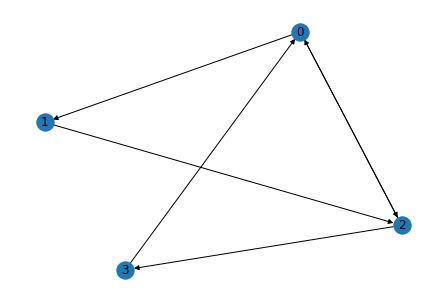

In [106]:
DG = nx.DiGraph()
DG.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,2),(2,0)])
import matplotlib.pyplot as plt
plt.clf() # on efface
nx.draw(DG, with_labels=True) # on dessine
plt.show() # on montre le dessin

### Exercice 7
Représenter le graphe orienté ci-dessous.
![graphes_networkx_ex7.png](https://ericecmorlaix.github.io/img/graphes_networkx_ex7.png)
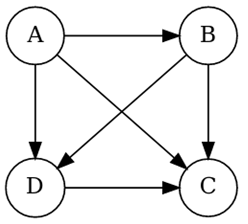

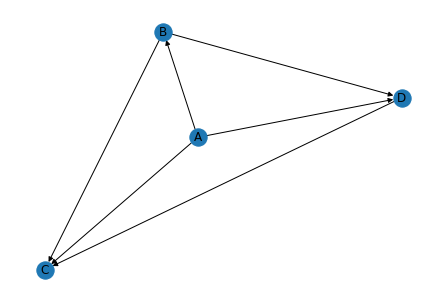

In [112]:
# votre code
import matplotlib.pyplot as plt
CO = nx.DiGraph()
CO.add_nodes_from(["A","B","C","D"])

CO.add_edges_from([("A","D"),("A","B"),("A","C"),("B","C"),("B","D"),("D","C")])
plt.clf() # on efface
nx.draw(CO, with_labels=True) # on dessine
plt.show() # on montre le dessin

### Exercice 8
A l'aide des fonctions précédentes, donner sa matrice d'adjacence et la liste des prédécesseurs. Vérifiez que ce sont les bons résultats.

In [117]:
# votre code
matriceDadjacence(CO)

[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 0], [0, 0, 1, 0]]

In [114]:
# votre code
listeDadjacence(CO)

{'A': ['B', 'C', 'D'], 'B': ['C', 'D'], 'C': [], 'D': ['C']}

### Exercice 9
Compléter la fonction <code>degreSortant</code> ci-dessous qui renvoie le degré sortant d'un sommet d'un graphe orienté G, puis la tester.

In [118]:
def degreSortant(G,s):
    ''' In : un graphe G orienté et un sommet s
        Out: le degré sortant de s'''
    cpt=0
    for t in G.nodes():# pour chaque joueur t
        if (s,t) in G.edges():# s'il y a un arc de s vers t, càd si s a gagné contre t
            cpt += 1
    return cpt

In [132]:
# Jeu de tests
for i in "ABCDEF" :
    print(f"{i} : {degreSortant(G, i)}")

A : 3
B : 2
C : 4
D : 2
E : 1
F : 0


In [130]:
# Jeu de tests
for i in "A","B","C","D","E","F","G","H","I","ACCUEIL","BOUTIQUE" :
    print(f"{i} : {degreSortant(M, i)}")

A : 4
B : 4
C : 4
D : 4
E : 4
F : 2
G : 4
H : 2
I : 0
ACCUEIL : 3
BOUTIQUE : 1


In [134]:
# Jeu de tests
for i in "ABCDEF" :
    print(f"{i} : {degreSortant(C, i)}")


A : 3
B : 3
C : 4
D : 2
E : 2
F : 0


In [135]:
# Test de la fonction précédente
# permet de voir que votre fonction à l'air correcte, c'est le cas si cette cellule ne renvoie pas d'erreur
DGAlea = nx.DiGraph()
DGAlea.add_edges_from([(1, 0), (1, 2), (1, 4), (1, 5), (1, 6), (1, 8), (1, 9), (0, 5), (0, 6), (0, 7), (0, 8), (2, 0), (2, 3), (2, 4), (2, 8), (2, 9), (3, 0), (3, 1), (3, 4), (3, 5), (3, 7), (3, 9), (4, 0), (4, 5), (4, 7), (4, 8), (4, 9), (5, 2), (5, 8), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (6, 9), (7, 1), (7, 2), (7, 5), (7, 8), (8, 3), (8, 6), (8, 9), (9, 0), (9, 5), (9, 7)])
assert [degreSortant(DGAlea,s) for s in DGAlea.nodes()]==[7, 4, 5, 5, 2, 6, 3, 3, 4, 6]